In [1]:
#Import libraries for data manipulation
import pandas as pd
import numpy as np
#from itertools import compress

#Import libraries for visualisation
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#READ IN DATA
confirmed=pd.read_csv(r"time_series_covid19_confirmed_global.csv")
recovered=pd.read_csv("time_series_covid19_Recovered_global.csv")
deaths=pd.read_csv("time_series_covid19_Deaths_global.csv")
country_codes=pd.read_csv("country_codes.csv",index_col='Country')
country_population=pd.read_csv("population_figures_by_country.csv",index_col='Country_Code',usecols=['Country_Code','Year_2016']) # only read in country code and most recent population

In [3]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,714,784,840,906,933,996,1026,1092,1176,1279
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,475,494,518,539,548,562,584,609,634,663
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,659,673,673,696,704,713,717,717,723,723
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,19,24,24,24,24,25,25


In [4]:
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,40,43,54,99,112,131,135,150,166,179
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,248,251,277,283,302,314,327,345,356,385
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,691,708,783,846,894,1047,1099,1152,1204,1355
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,128,169,169,191,205,235,248,282,309,333
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,5,5,5,5,6,6,6,6,6,6


In [5]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,23,25,30,30,30,33,36,36,40,42
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,24,25,26,26,26,26,26,26,27,27
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,326,336,348,364,367,375,384,392,402,407
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,31,33,33,35,35,36,37,37,37,37
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [6]:
confirmed.columns 

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20'

In [7]:
deaths.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20'

In [8]:
confirmed.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20',
       '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20',
       '4/13/20', '4/14/20', '4/15

In [9]:
dates = confirmed.columns[4:]
confirmed_long = confirmed.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Confirmed'
)
deaths_long = deaths.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Deaths'
)
recovered_long = recovered.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Recovered'
)

In [10]:
confirmed_long

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
24547,Saint Pierre and Miquelon,France,46.885200,-56.315900,4/23/20,1
24548,NaN,South Sudan,6.877000,31.307000,4/23/20,5
24549,NaN,Western Sahara,24.215500,-12.885800,4/23/20,6
24550,NaN,Sao Tome and Principe,0.186360,6.613081,4/23/20,4


In [11]:
recovered_long = recovered_long[recovered_long['Country/Region']!='Canada']
recovered_long

,Province/State,Country/Region,Lat,Long,Date,Recovered
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
23245,Saint Pierre and Miquelon,France,46.885200,-56.315900,4/23/20,0
23246,NaN,South Sudan,6.877000,31.307000,4/23/20,0
23247,NaN,Western Sahara,24.215500,-12.885800,4/23/20,5
23248,NaN,Sao Tome and Principe,0.186360,6.613081,4/23/20,0


In [12]:
# Merging confirmed_df_long and deaths_df_long
full_table = confirmed_long.merge(
  right=deaths_long, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)
# Merging full_table and recovered_df_long
full_table = full_table.merge(
  right=recovered_long, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)

In [13]:
full_table

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.000000,65.000000,1/22/20,0,0,0.0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0.0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0.0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0.0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0.0
...,...,...,...,...,...,...,...,...
24547,Saint Pierre and Miquelon,France,46.885200,-56.315900,4/23/20,1,0,0.0
24548,NaN,South Sudan,6.877000,31.307000,4/23/20,5,0,NaN
24549,NaN,Western Sahara,24.215500,-12.885800,4/23/20,6,0,5.0
24550,NaN,Sao Tome and Principe,0.186360,6.613081,4/23/20,4,0,0.0


In [14]:
full_table['Date'] = pd.to_datetime(full_table['Date'])


In [15]:
full_table.isnull().sum()

Province/State    16926
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered          2604
dtype: int64

In [16]:
full_table['Recovered'] = full_table['Recovered'].fillna(0)


In [17]:
full_table

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.000000,65.000000,2020-01-22,0,0,0.0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0.0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0.0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0.0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0.0
...,...,...,...,...,...,...,...,...
24547,Saint Pierre and Miquelon,France,46.885200,-56.315900,2020-04-23,1,0,0.0
24548,NaN,South Sudan,6.877000,31.307000,2020-04-23,5,0,0.0
24549,NaN,Western Sahara,24.215500,-12.885800,2020-04-23,6,0,5.0
24550,NaN,Sao Tome and Principe,0.186360,6.613081,2020-04-23,4,0,0.0


In [18]:
full_table.isnull().sum()

Province/State    16926
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [19]:
ship_rows = full_table['Province/State'].str.contains('Grand Princess') | full_table['Province/State'].str.contains('Diamond Princess') | full_table['Country/Region'].str.contains('Diamond Princess') | full_table['Country/Region'].str.contains('MS Zaandam')
full_ship = full_table[ship_rows]

In [20]:
full_ship

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
37,Grand Princess,Canada,37.6489,-122.6655,2020-01-22,0,0,0.0
88,NaN,Diamond Princess,0.0000,0.0000,2020-01-22,0,0,0.0
231,Diamond Princess,Canada,0.0000,0.0000,2020-01-22,0,0,0.0
252,NaN,MS Zaandam,0.0000,0.0000,2020-01-22,0,0,0.0
301,Grand Princess,Canada,37.6489,-122.6655,2020-01-23,0,0,0.0
...,...,...,...,...,...,...,...,...
24276,NaN,MS Zaandam,0.0000,0.0000,2020-04-22,9,2,0.0
24325,Grand Princess,Canada,37.6489,-122.6655,2020-04-23,-1,-1,0.0
24376,NaN,Diamond Princess,0.0000,0.0000,2020-04-23,712,13,645.0
24519,Diamond Princess,Canada,0.0000,0.0000,2020-04-23,0,1,0.0


In [21]:
full_table = full_table[~(ship_rows)]


In [22]:
full_table

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.000000,65.000000,2020-01-22,0,0,0.0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0.0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0.0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0.0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0.0
...,...,...,...,...,...,...,...,...
24547,Saint Pierre and Miquelon,France,46.885200,-56.315900,2020-04-23,1,0,0.0
24548,NaN,South Sudan,6.877000,31.307000,2020-04-23,5,0,0.0
24549,NaN,Western Sahara,24.215500,-12.885800,2020-04-23,6,0,5.0
24550,NaN,Sao Tome and Principe,0.186360,6.613081,2020-04-23,4,0,0.0


In [23]:
# Active Case = confirmed - deaths - recovered
full_table['Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']

C:\Users\Hamxa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
full_table

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,NaN,Afghanistan,33.000000,65.000000,2020-01-22,0,0,0.0,0.0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0.0,0.0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0.0,0.0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0.0,0.0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
24547,Saint Pierre and Miquelon,France,46.885200,-56.315900,2020-04-23,1,0,0.0,1.0
24548,NaN,South Sudan,6.877000,31.307000,2020-04-23,5,0,0.0,5.0
24549,NaN,Western Sahara,24.215500,-12.885800,2020-04-23,6,0,5.0,1.0
24550,NaN,Sao Tome and Principe,0.186360,6.613081,2020-04-23,4,0,0.0,4.0


In [25]:
full_grouped = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
full_grouped 

,Date,Country/Region,Confirmed,Deaths,Recovered,Active
0,2020-01-22,Afghanistan,0,0,0.0,0.0
1,2020-01-22,Albania,0,0,0.0,0.0
2,2020-01-22,Algeria,0,0,0.0,0.0
3,2020-01-22,Andorra,0,0,0.0,0.0
4,2020-01-22,Angola,0,0,0.0,0.0
...,...,...,...,...,...,...
17014,2020-04-23,West Bank and Gaza,480,4,92.0,384.0
17015,2020-04-23,Western Sahara,6,0,5.0,1.0
17016,2020-04-23,Yemen,1,0,0.0,1.0
17017,2020-04-23,Zambia,76,3,37.0,36.0


In [26]:
# new cases 
temp = full_grouped.groupby(['Country/Region', 'Date', ])['Confirmed', 'Deaths', 'Recovered']
temp = temp.sum().diff().reset_index()
mask = temp['Country/Region'] != temp['Country/Region'].shift(1)
temp.loc[mask, 'Confirmed'] = np.nan
temp.loc[mask, 'Deaths'] = np.nan
temp.loc[mask, 'Recovered'] = np.nan
# renaming columns
temp.columns = ['Country/Region', 'Date', 'New cases', 'New deaths', 'New recovered']
# merging new values
full_grouped = pd.merge(full_grouped, temp, on=['Country/Region', 'Date'])
# filling na with 0
full_grouped = full_grouped.fillna(0)
# fixing data types
cols = ['New cases', 'New deaths', 'New recovered']
full_grouped[cols] = full_grouped[cols].astype('int')
# 
full_grouped['New cases'] = full_grouped['New cases'].apply(lambda x: 0 if x<0 else x)

In [27]:
full_grouped

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...
17014,2020-04-23,West Bank and Gaza,480,4,92.0,384.0,6,0,21
17015,2020-04-23,Western Sahara,6,0,5.0,1.0,0,0,5
17016,2020-04-23,Yemen,1,0,0.0,1.0,0,0,0
17017,2020-04-23,Zambia,76,3,37.0,36.0,2,0,2


In [28]:
import altair as alt

In [29]:
full_grouped.to_csv('COVID-19-time-series-clean-complete.csv')


In [30]:
full_grouped = pd.read_csv('COVID-19-time-series-clean-complete.csv', parse_dates=['Date'])
uk = full_grouped[full_grouped['Country/Region'] == 'United Kingdom']

In [31]:
base = alt.Chart(uk).mark_bar().encode(
    x='monthdate(Date):O',
).properties(
    width=500
)

In [32]:
red=alt.value("#f54242")
base.encode(y='Confirmed').properties(title='Total_Confirmed') | base.encode(y='Active').properties(title='Total_Active')

alt.HConcatChart(...)

In [33]:
import pandas as pd
import altair as alt
full_grouped = pd.read_csv('COVID-19-time-series-clean-complete.csv', parse_dates=['Date'])
countries = ['US', 'Italy', 'China', 'Spain', 'Germany', 'France', 'Iran', 'United Kingdom', 'Switzerland']
selected_countries = full_grouped[full_grouped['Country/Region'].isin(countries)]

In [34]:
alt.Chart(selected_countries).mark_circle().encode(
    x='monthdate(Date):O',
    y='Country/Region',
    color='Country/Region',
    size=alt.Size('New cases:Q',
        scale=alt.Scale(range=[0, 1000]),
        legend=alt.Legend(title='Daily new cases')
    ) 
).properties(
    width=800,
    height=300
)

alt.Chart(...)

In [35]:
import pandas as pd
import altair as alt
full_grouped = pd.read_csv('COVID-19-time-series-clean-complete.csv', parse_dates=['Date'])
countries = ['US', 'Italy', 'China', 'Spain', 'Germany', 'France', 'Iran', 'United Kingdom', 'Switzerland']
selected_countries = full_grouped[full_grouped['Country/Region'].isin(countries)]



alt.Chart(selected_countries).mark_circle().encode(
    x='monthdate(Date):O',
    y='Country/Region',
    color='Country/Region',
    size=alt.Size('New cases:Q',
        scale=alt.Scale(range=[0, 1000]),
        legend=alt.Legend(title='Daily new cases')
    ) 
).properties(
    width=800,
    height=300
)

alt.Chart(...)

In [36]:
full_grouped.head()

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0


In [37]:
df=full_grouped[['Confirmed','Active','Country/Region','Date']]

In [38]:
df

,Confirmed,Active,Country/Region,Date
0,0,0.0,Afghanistan,2020-01-22
1,0,0.0,Albania,2020-01-22
2,0,0.0,Algeria,2020-01-22
3,0,0.0,Andorra,2020-01-22
4,0,0.0,Angola,2020-01-22
...,...,...,...,...
17014,480,384.0,West Bank and Gaza,2020-04-23
17015,6,1.0,Western Sahara,2020-04-23
17016,1,1.0,Yemen,2020-04-23
17017,76,36.0,Zambia,2020-04-23


In [39]:
df.corr()

,Confirmed,Active
Confirmed,1.000000,0.973191
Active,0.973191,1.000000


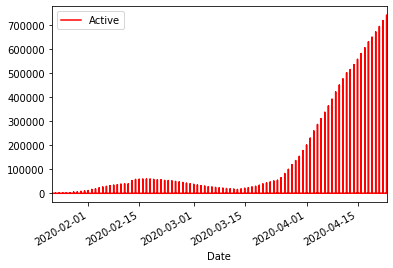

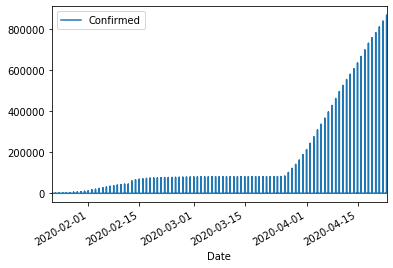

In [40]:
#filtering data set to get only rows which has location 3
# mask = (df['Location'] ==3)
# df1=df.loc[mask]

#ploting data 
ax = plt.gca()
df.plot(kind='line',x='Date',y='Confirmed')
df.plot(kind='line',x='Date',y='Active', color='red', ax=ax)
plt.show()


In [41]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# sns.barplot(x="Date", y="Active", hue="Country/Region", data=df,
#            palette = sns.xkcd_palette(["windows blue", "amber",  "raspberry"]))
# sns.barplot(x="Date", y="Confirmed", hue="Country/Region", data=df,
#            palette = sns.xkcd_palette(["grey blue", "pumpkin",  "reddish pink"]))


# handles, labels = plt.gca().get_legend_handles_labels()

# handles = [handles[0], handles[3], handles[6], handles[1], handles[4], handles[7], handles[2], handles[5], handles[8]]

# # labels = ['settlements - won game', 'settlements - avg game','settlements - lost game',
# #          'cities - won game', 'cities - avg game','cities - lost game',
# #          'roads - won game','roads - avg game','roads - lost game']
# plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title = "building type")
# plt.show()


In [42]:
#To rename Column header having space
df.rename(columns={'Country/Region': 'Country_Region',
                                   }, inplace=True)
print(df.shape)
df

(17019, 4)


C:\Users\Hamxa\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Confirmed,Active,Country_Region,Date
0,0,0.0,Afghanistan,2020-01-22
1,0,0.0,Albania,2020-01-22
2,0,0.0,Algeria,2020-01-22
3,0,0.0,Andorra,2020-01-22
4,0,0.0,Angola,2020-01-22
...,...,...,...,...
17014,480,384.0,West Bank and Gaza,2020-04-23
17015,6,1.0,Western Sahara,2020-04-23
17016,1,1.0,Yemen,2020-04-23
17017,76,36.0,Zambia,2020-04-23


In [66]:
df['Country_Region'].value_counts().head(50)

Norway                 93
Liberia                93
Israel                 93
Congo (Brazzaville)    93
Kyrgyzstan             93
Netherlands            93
Angola                 93
Austria                93
Mauritania             93
Latvia                 93
Qatar                  93
Serbia                 93
Philippines            93
Somalia                93
Portugal               93
Uganda                 93
Montenegro             93
Iran                   93
Eritrea                93
Saint Lucia            93
Bhutan                 93
Cabo Verde             93
Nepal                  93
Canada                 93
Suriname               93
Egypt                  93
South Sudan            93
Thailand               93
Mexico                 93
San Marino             93
Belgium                93
Burma                  93
US                     93
Laos                   93
Seychelles             93
Guinea                 93
Iceland                93
Ecuador                93
Morocco     

In [43]:
sub=df[['Active','Confirmed']]
sub

,Active,Confirmed
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
...,...,...
17014,384.0,480
17015,1.0,6
17016,1.0,1
17017,36.0,76


In [44]:

# plt.figure(figsize=(8,4))
# b=plt.barh(df['Active'],width=-2,)
# plt.title('fav',fontsize=20)
# plt.xticks(df['Date'])
# plt.legend(b,df['Date'],fontsize=12)
# plt.show

In [45]:
print('sh')


sh


In [46]:
# countries = ['US', 'Italy', 'China', 'Spain', 'Germany', 'France', 'Iran', 'United Kingdom', 'Switzerland']
# selected_countries = df[df['Country_Region'].isin(countries)]

# plt.figure(figsize=(8,4))
# b=plt.barh(df['Active'],width=-2,)
# plt.title('fav',fontsize=20)
# plt.xticks(df['Date'],selected_countries)
# plt.legend(b,df['Date'],fontsize=12)
# plt.show

In [47]:
def plot_by_date(df,countries,log,title,xtitle,ytitle):
    
    fig=plt.figure(figsize=(20,10))
    ax = fig.add_subplot()
    ax.set_facecolor('whitesmoke')
    plt.grid(True, linewidth=1, color='dimgrey',linestyle=':')
    
    df=df.loc[countries].T
    plt.plot(df) #linestyle="--"
    plt.legend(df.columns,bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.,frameon=False)
    
    xmin=0;xmax=90;ymin=10;ymax=1000000
    ax.set_xlim(xmin=xmin, xmax=xmax)
    ax.set_ylim(ymin=ymin,ymax=ymax)
    ax.set_ylabel(ytitle)
    ax.set_xlabel(xtitle)
    ax.set_title(title)
    ax.set_xticklabels(df.T.columns, rotation = 70)
    
    n = 3  # Keeps every 7th xlabel
    [l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]
    
    if log==1:
        ax.set_yscale('log')
    return plt.show()

#horizontalalignment='right')

In [76]:
countries = ['US', 'Italy', 'China', 'Spain', 'Germany', 'France', 'Iran', 'United Kingdom', 'Switzerland','Australia','Pakistan']
selected_countries = df[df['Country_Region'].isin(countries)]
selected_countries





,Confirmed,Active,Country_Region,Date
8,0,0.0,Australia,2020-01-22
36,548,503.0,China,2020-01-22
60,0,0.0,France,2020-01-22
64,0,0.0,Germany,2020-01-22
79,0,0.0,Iran,2020-01-22
...,...,...,...,...
16962,11155,8391.0,Pakistan,2020-04-23
16990,213024,101617.0,Spain,2020-04-23
16995,28496,6347.0,Switzerland,2020-04-23
17005,869170,739013.0,US,2020-04-23


In [49]:
# plt.figure(figsize=(18,14))
# b=plt.barh(df['Active'],width=-2,)
# plt.title('fav',fontsize=2)
# plt.xticks(df['Date'],selected_countries)
# plt.legend(b,df['Date'],fontsize=2)
# plt.show

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000208E5ED5C48>,
      dtype=object)

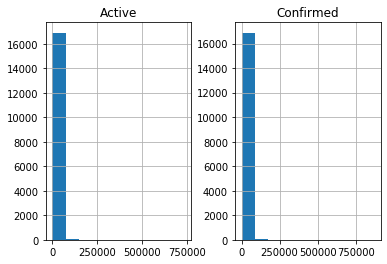

In [50]:
df.hist()

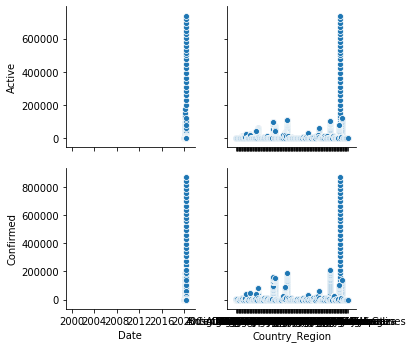

In [51]:
pp = sns.pairplot(data=df,
                  y_vars=['Active','Confirmed'],
                  x_vars=['Date','Country_Region'])


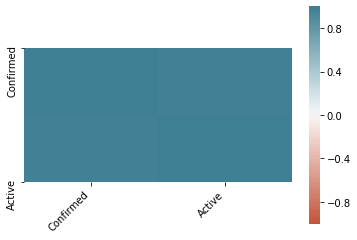

In [52]:
# 1
# sir hajud
corr = df.corr()  # whole data frame jo b do
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [53]:
df.corr()

,Confirmed,Active
Confirmed,1.000000,0.973191
Active,0.973191,1.000000


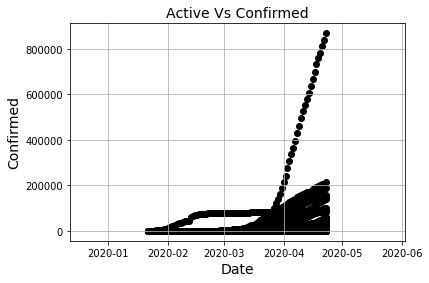

In [54]:
#Scatter plot
import pandas as pd
import matplotlib.pyplot as plt
   
plt.scatter(df['Date'], df['Confirmed'], color='black')
plt.title('Active Vs Confirmed', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Confirmed', fontsize=14)
plt.grid(True)
plt.show()

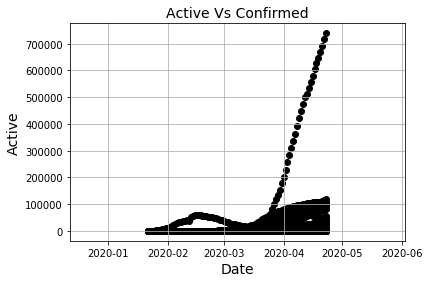

In [55]:
#Scatter plot
import pandas as pd
import matplotlib.pyplot as plt
   
plt.scatter(df['Date'], df['Active'], color='black')
plt.title('Active Vs Confirmed', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Active', fontsize=14)
plt.grid(True)
plt.show()

# 4.3 Country by country comparison ( Active vs Confirmed)

In [83]:
selected_countries


,Confirmed,Active,Country_Region,Date
8,0,0.0,Australia,2020-01-22
36,548,503.0,China,2020-01-22
60,0,0.0,France,2020-01-22
64,0,0.0,Germany,2020-01-22
79,0,0.0,Iran,2020-01-22
...,...,...,...,...
16962,11155,8391.0,Pakistan,2020-04-23
16990,213024,101617.0,Spain,2020-04-23
16995,28496,6347.0,Switzerland,2020-04-23
17005,869170,739013.0,US,2020-04-23


In [60]:
selected_countries.shape


(837, 4)

In [61]:
selected_countries['Country_Region'].value_counts()


France            93
Germany           93
US                93
Italy             93
China             93
Spain             93
Switzerland       93
Iran              93
United Kingdom    93
Name: Country_Region, dtype: int64

In [67]:
country=['US']
sel=selected_countries[selected_countries['Country_Region'].isin(country)]
sel

,Confirmed,Active,Country_Region,Date
169,1,1.0,US,2020-01-22
352,1,1.0,US,2020-01-23
535,2,2.0,US,2020-01-24
718,2,2.0,US,2020-01-25
901,5,5.0,US,2020-01-26
...,...,...,...,...
16273,758809,647811.0,US,2020-04-19
16456,784326,669903.0,US,2020-04-20
16639,811865,692217.0,US,2020-04-21
16822,840351,716363.0,US,2020-04-22


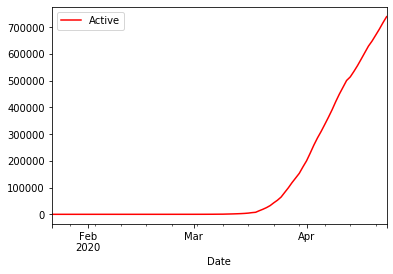

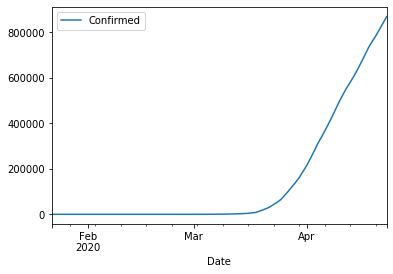

In [68]:
#filtering data set to get only rows which has location 3
# mask = (df['Location'] ==3)
# df1=df.loc[mask]


#ploting data 
ax = plt.gca()
sel.plot(kind='line',x='Date',y='Confirmed')
sel.plot(kind='line',x='Date',y='Active', color='red', ax=ax)
plt.show()


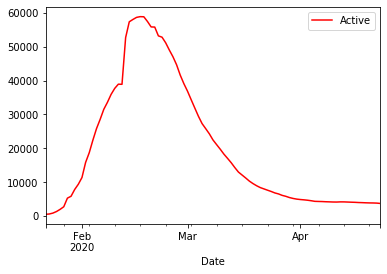

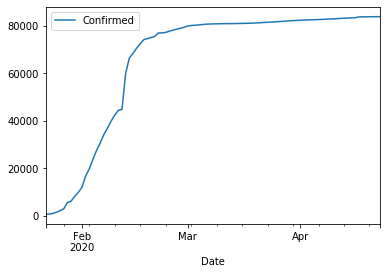

In [69]:
country=['China']
sel=selected_countries[selected_countries['Country_Region'].isin(country)]
sel

ax = plt.gca()
sel.plot(kind='line',x='Date',y='Confirmed')
sel.plot(kind='line',x='Date',y='Active', color='red', ax=ax)
plt.show()


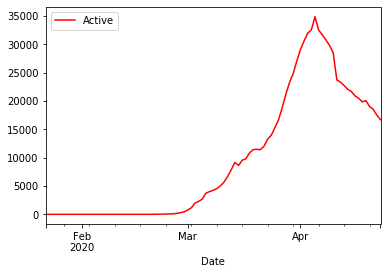

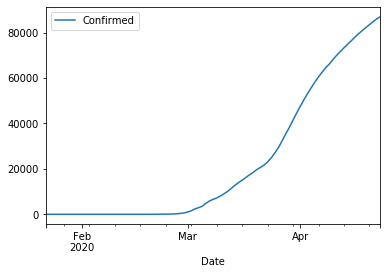

In [72]:
country=['Iran']
sel=selected_countries[selected_countries['Country_Region'].isin(country)]
sel

ax = plt.gca()
sel.plot(kind='line',x='Date',y='Confirmed')
sel.plot(kind='line',x='Date',y='Active', color='red', ax=ax)
plt.show()


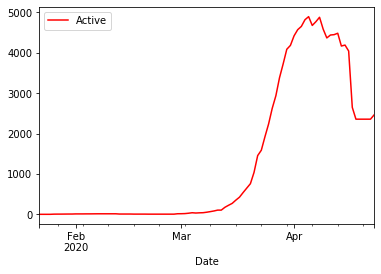

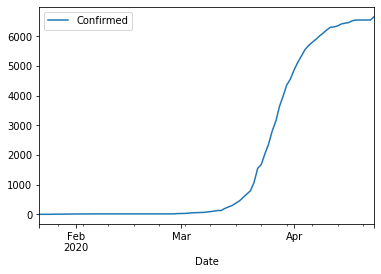

In [77]:
country=['Australia']
sel=selected_countries[selected_countries['Country_Region'].isin(country)]
sel

ax = plt.gca()
sel.plot(kind='line',x='Date',y='Confirmed')
sel.plot(kind='line',x='Date',y='Active', color='red', ax=ax)
plt.show()


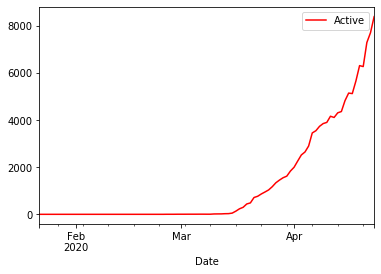

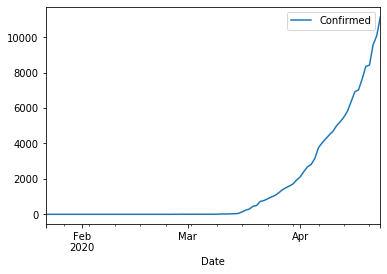

In [78]:
country=['Pakistan']
sel=selected_countries[selected_countries['Country_Region'].isin(country)]
sel

ax = plt.gca()
sel.plot(kind='line',x='Date',y='Confirmed')
sel.plot(kind='line',x='Date',y='Active', color='red', ax=ax)
plt.show()


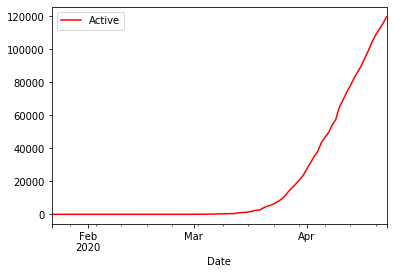

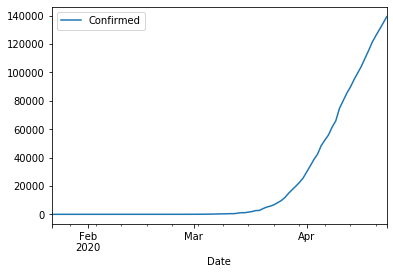

In [79]:

country=['United Kingdom']
sel=selected_countries[selected_countries['Country_Region'].isin(country)]
sel

ax = plt.gca()
sel.plot(kind='line',x='Date',y='Confirmed')
sel.plot(kind='line',x='Date',y='Active', color='red', ax=ax)
plt.show()


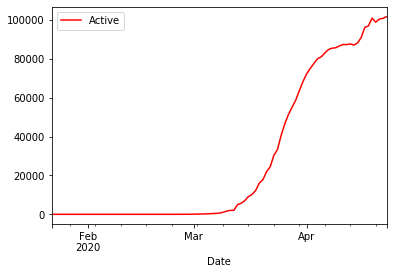

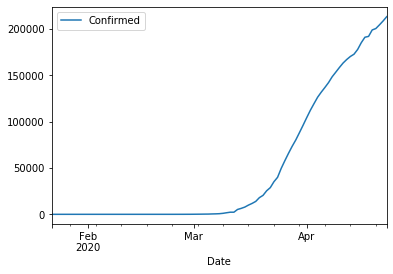

In [80]:

country=['Spain']
sel=selected_countries[selected_countries['Country_Region'].isin(country)]
sel

ax = plt.gca()
sel.plot(kind='line',x='Date',y='Confirmed')
sel.plot(kind='line',x='Date',y='Active', color='red', ax=ax)
plt.show()


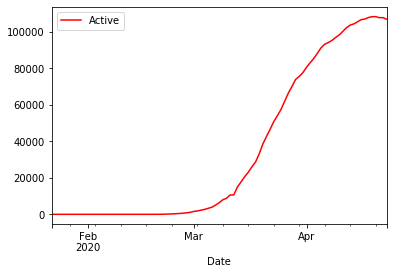

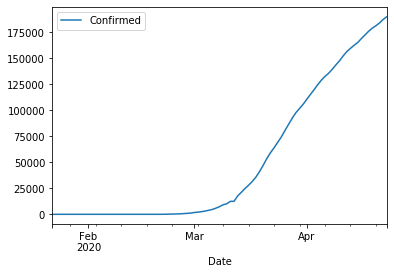

In [82]:

country=['Italy']
sel=selected_countries[selected_countries['Country_Region'].isin(country)]
sel

ax = plt.gca()
sel.plot(kind='line',x='Date',y='Confirmed')
sel.plot(kind='line',x='Date',y='Active', color='red', ax=ax)
plt.show()
